<a href="https://colab.research.google.com/github/jayshivankar/EDA_Student_Performance/blob/main/EDA_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_old = pd.read_csv("/content/student_habits_performance.csv")
data_old.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
data_old.shape

(1000, 16)

In [ ]:
data_old.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


In [ ]:
data_old.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
data_old.dropna(inplace=True)
data_old.shape

(909, 16)

In [ ]:
data_old.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
data = data_old.drop(['student_id'], axis=1)
data.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
# calculating number of unique values for categorical columns
for cols in data.columns:
    if data[cols].dtype == 'O':  # 'O' means object (typically string)
        if data[cols].nunique() == 1:
            print(f"**{cols} has 1 unique value**")
        else:
            print(f"{cols} has {data[cols].nunique()} unique values")


gender has 3 unique values
part_time_job has 2 unique values
diet_quality has 3 unique values
parental_education_level has 3 unique values
internet_quality has 3 unique values
extracurricular_participation has 2 unique values


In [ ]:
# calculating number of unique values for numerical columns
for cols in data.columns:
    if data[cols].dtype != 'O':
        if data[cols].nunique() == 1:
            print(f"**{cols} has 1 unique value**")
        elif data[cols].nunique() == data.shape[0]:
            print(f"**{cols} has {data.shape[0]} unique value**")
        else:
            print(f"{cols} has {data[cols].nunique()} unique values")

age has 8 unique values
study_hours_per_day has 76 unique values
social_media_hours has 59 unique values
netflix_hours has 49 unique values
attendance_percentage has 316 unique values
sleep_hours has 67 unique values
exercise_frequency has 7 unique values
mental_health_rating has 10 unique values
exam_score has 453 unique values


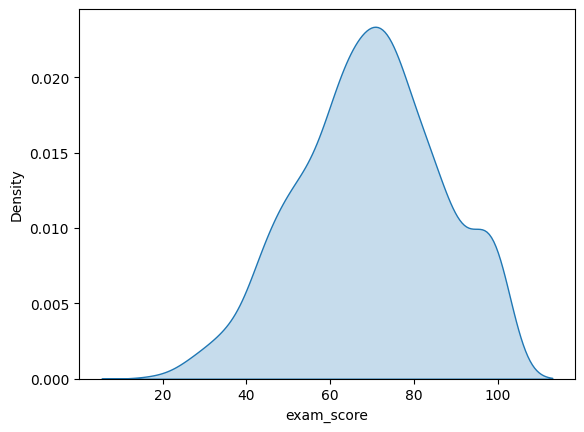

In [ ]:
# examine the target variable
sns.kdeplot(data = data,x = 'exam_score', fill=True)
plt.show()

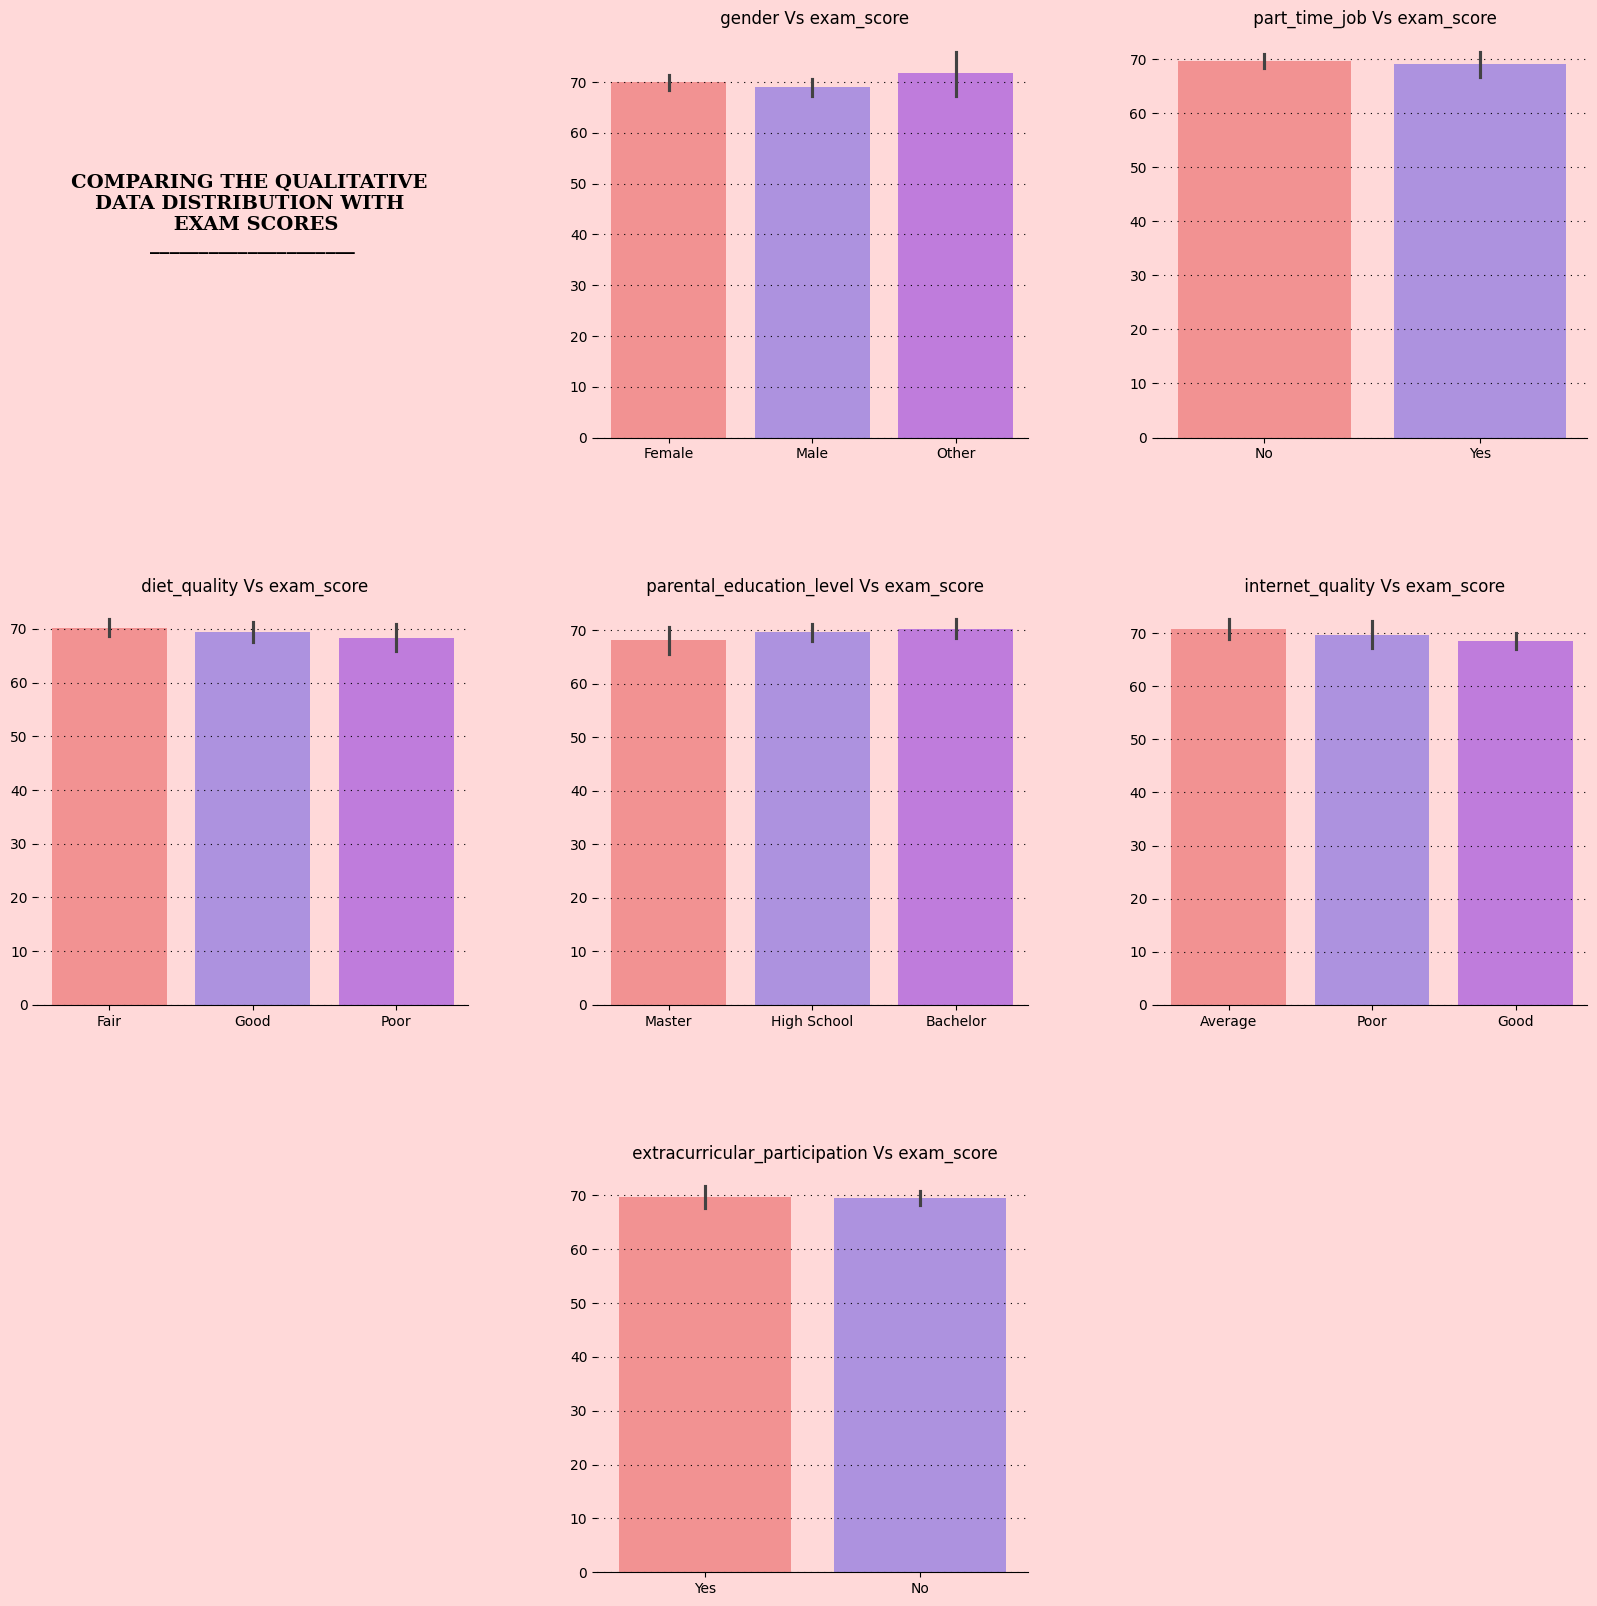

In [ ]:
# Comparing the categorical values with exam scores
# Creating the plot structure
fig = plt.figure(figsize=(20, 20))
spec = fig.add_gridspec(3, 3)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,1])


# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07]:
    section.set_facecolor(bg_color)

# plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07 ]

cnt = 0
for feature in data.columns:
    if data[feature].dtype == 'O':
        sns.barplot(data, y='exam_score', x=feature,
                    fill=True, palette=["#FF3333","#4933FF","#8000FF"],
                    alpha=0.5, ax=sec[cnt],orient='v')
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(f' {feature} ' + 'Vs exam_score')
        sec[cnt].grid(color='#000000', ls=':', axis='y', dashes=(1,5))

        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)

        cnt += 1


# Creating plot structure title
sec_01.text(0.5,0.5,'COMPARING THE QUALITATIVE \nDATA DISTRIBUTION WITH \n EXAM SCORES\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)


#  OBSERVATIONS


*   Gender does not strongly influence exam performance, though "Other" has a slight edge.
*   Balancing a job might slightly hinder academic performance.
*   Diet quality has a small but visible impact on exam performance.
*   Higher parental education might correlate with slightly better student performance, though the difference is minimal.
*   Better internet does not necessarily equate to better scores—possibly due to distractions or other confounding factors.
*   Academic performance might benefit from reduced extracurricular load, or students may prioritize academics over activities.





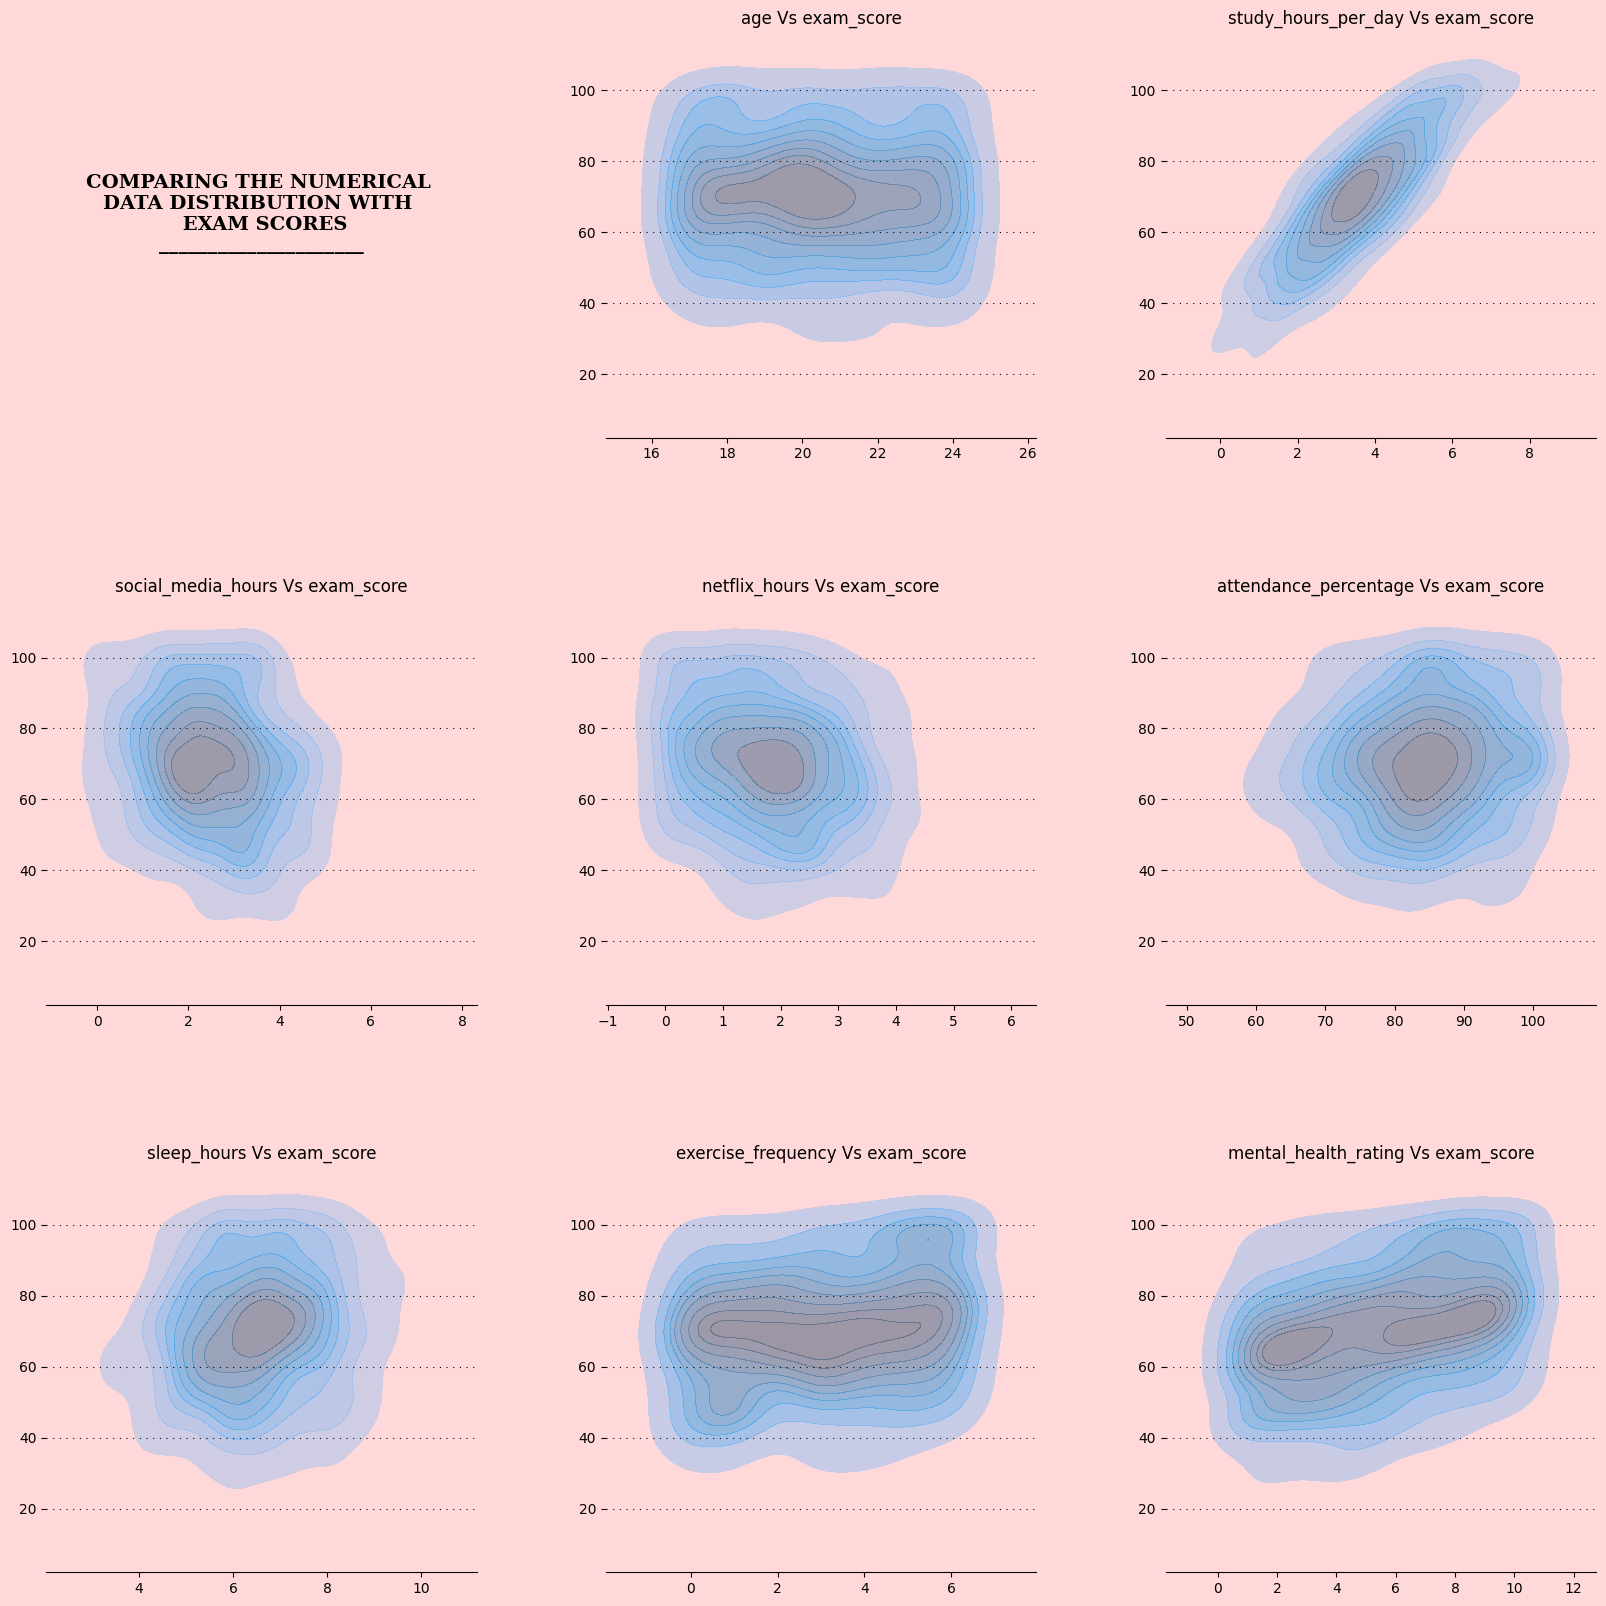

In [ ]:
# Comparing the numerical values with exam scores
# Creating the plot structure
fig = plt.figure(figsize=(20, 20))
spec = fig.add_gridspec(3, 3)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])



# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06 ,sec_07 ,sec_08,sec_09]:
    section.set_facecolor(bg_color)

# plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07,sec_08,sec_09 ]

cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O':
        if cnt >= len(sec):
            break
        sns.kdeplot(data, y='exam_score', x=feature,
                    fill=True, palette=["#FF3333"],
                    alpha=0.5, ax=sec[cnt])
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title( f'{feature} ' + 'Vs exam_score')
        sec[cnt].grid(color='#000000', ls=':', axis='y', dashes=(1,5))

        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)

        cnt += 1


# Creating plot structure title
sec_01.text(0.5,0.5,'COMPARING THE NUMERICAL \nDATA DISTRIBUTION WITH \n EXAM SCORES\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

#  OBSERVATIONS



*   Age does not significantly influence exam performance.

*    Study hours per day is the strongest predictor of exam performance among all variables shown.
*     Excessive social media use may negatively affect academic performance.
*    Leisure screen time may have a mild inverse relationship with exam performance.
* Better attendance correlates with better academic performance.
* Maintaining balanced sleep is beneficial; extremes in sleep duration may hurt exam outcomes.
* Exercise frequency has no effect on exam performance
* Students with high mental health rating have good marks

## UNIVARIATE ANALYSIS ##


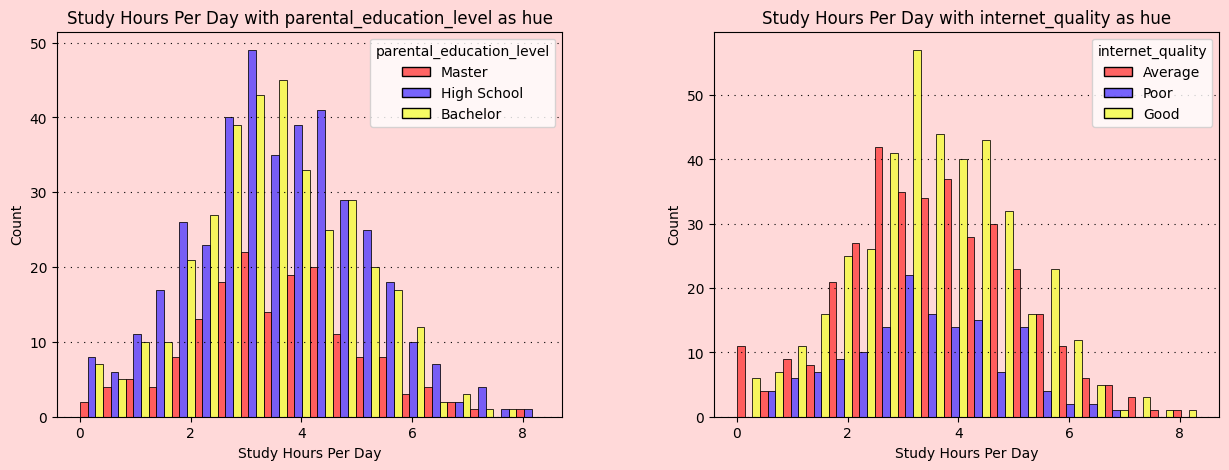

In [ ]:
fig = plt.figure(figsize=(15, 5))
spec = fig.add_gridspec(1, 2)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0, 0])
sec_02 = fig.add_subplot(spec[0, 1])

# Adding background color
bg_color = '#ffd9d9'
fig.patch.set_facecolor(bg_color)
sec_01.set_facecolor(bg_color)
sec_02.set_facecolor(bg_color)

# Histogram: Study Hours vs Parental Education Level
feature_1 = 'parental_education_level'
palette_1 = ["#FF3333", "#4933FF", "#F3FF33"]

sns.histplot(
    data=data,
    x='study_hours_per_day',
    hue=feature_1,
    multiple='dodge',
    palette=palette_1,
    bins=20,
    ax=sec_01
)
sec_01.set_title(f'Study Hours Per Day with {feature_1} as hue')
sec_01.set_xlabel('Study Hours Per Day')
sec_01.set_ylabel('Count')
sec_01.grid(color='#000000', ls=':', axis='y', dashes=(1, 5))

# Histogram: Study Hours vs Internet Quality
feature_2 = 'internet_quality'
palette_2 = ["#FF3333", "#4933FF", "#F3FF33"]

sns.histplot(
    data=data,
    x='study_hours_per_day',
    hue=feature_2,
    multiple='dodge',
    palette=palette_2,
    bins=20,
    ax=sec_02
)
sec_02.set_title(f'Study Hours Per Day with {feature_2} as hue')
sec_02.set_xlabel('Study Hours Per Day')
sec_02.set_ylabel('Count')
sec_02.grid(color='#000000', ls=':', axis='y', dashes=(1, 5))

plt.show()


#OBSERVATION


*   Students with parental education level as high school are more aware about studies .
* Still average exam scores of both high school and bachelor are same stating pe level as bachelor are more intelligent .
*Even though students with internet quality as good have more study time than average but exam scores area same.
*Can be due to other distractions due to good internet quality.

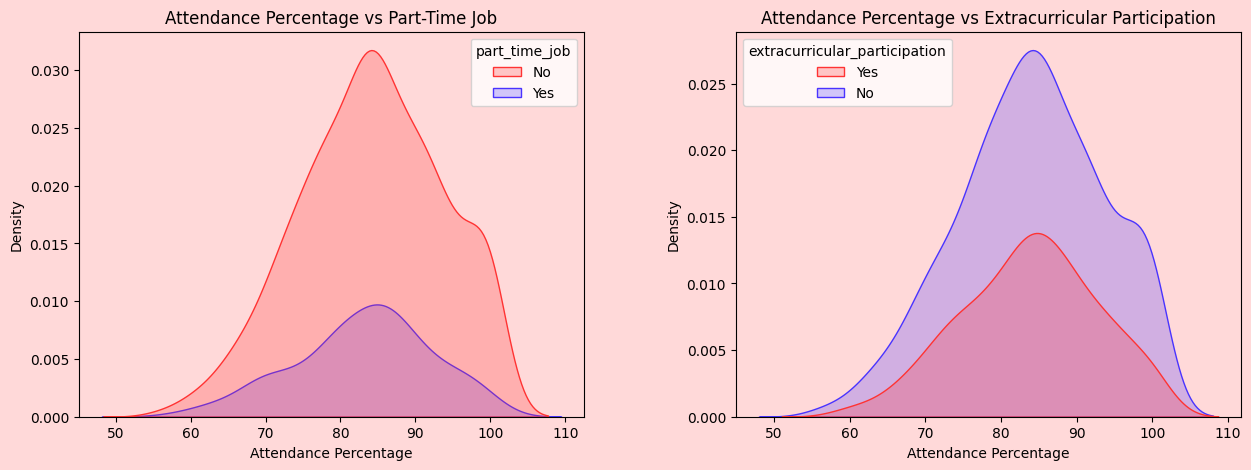

In [ ]:
fig = plt.figure(figsize=(15, 5))
spec = fig.add_gridspec(1, 2)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0, 0])
sec_02 = fig.add_subplot(spec[0, 1])

# Adding background color
bg_color = '#ffd9d9'
fig.patch.set_facecolor(bg_color)
sec_01.set_facecolor(bg_color)
sec_02.set_facecolor(bg_color)

# KDE plot: Attendance vs Part-time Job
sns.kdeplot(
    data=data,
    x='attendance_percentage',
    fill=True,
    hue='part_time_job',
    ax=sec_01,
    palette=["#FF3333", "#4933FF"]
)
sec_01.set_title('Attendance Percentage vs Part-Time Job')
sec_01.set_xlabel('Attendance Percentage')
sec_01.set_ylabel('Density')

# KDE plot: Attendance vs Extracurricular Participation
sns.kdeplot(
    data=data,
    x='attendance_percentage',
    fill=True,
    hue='extracurricular_participation',
    ax=sec_02,
    palette=["#FF3333", "#4933FF"]
)
sec_02.set_title('Attendance Percentage vs Extracurricular Participation')
sec_02.set_xlabel('Attendance Percentage')
sec_02.set_ylabel('Density')

plt.show()


# OBSERVATION


*   Students not having part time jobs and no extracurricular activity have higher attendance
* 'Yes' in both graphs follow similar pattern as 'No' with lower density.


# BIVARIATE ANALYSIS

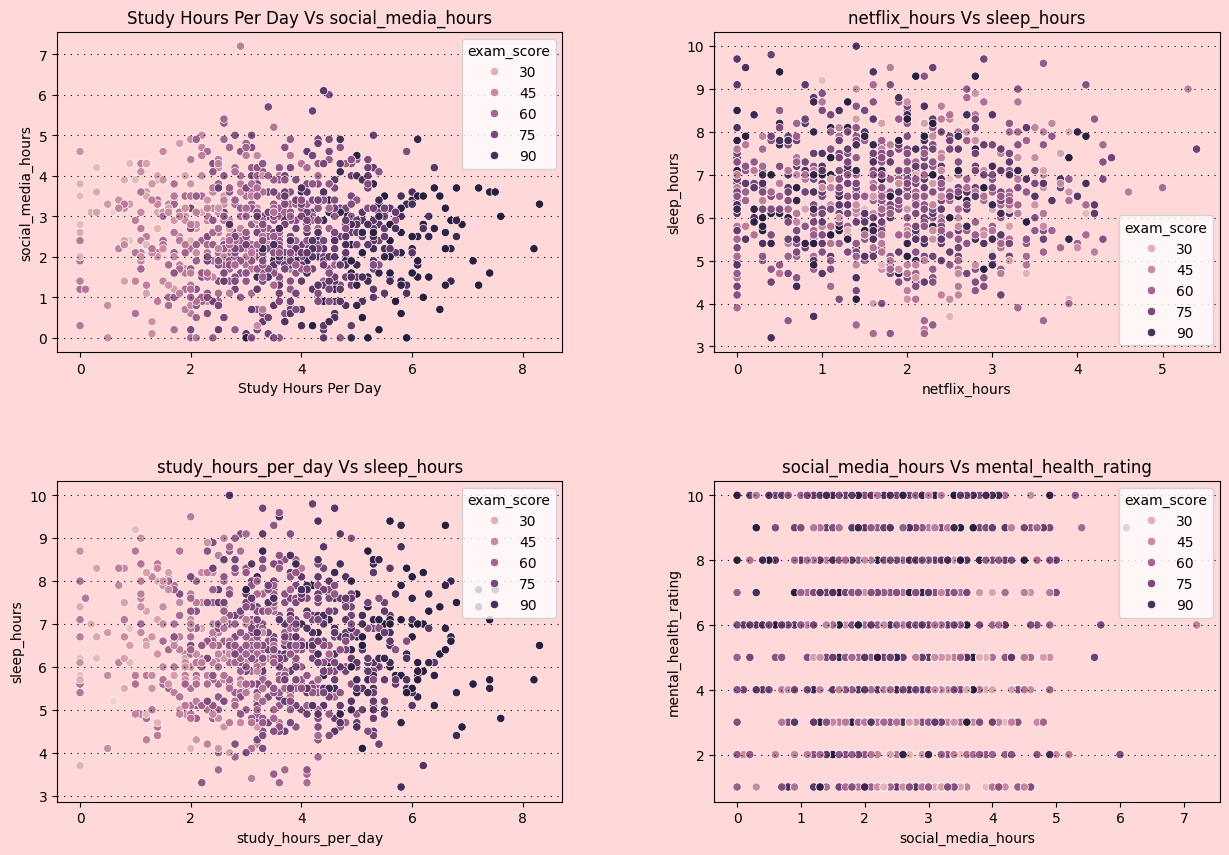

In [ ]:
# comparing study hours per day with social media use

fig = plt.figure(figsize=(15, 10))
spec = fig.add_gridspec(2, 2)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0, 0])
sec_02 = fig.add_subplot(spec[0, 1])
sec_03 = fig.add_subplot(spec[1, 0])
sec_04 = fig.add_subplot(spec[1, 1])

# Adding background color
bg_color = '#ffd9d9'
fig.patch.set_facecolor(bg_color)
sec_01.set_facecolor(bg_color)
sec_02.set_facecolor(bg_color)
sec_03.set_facecolor(bg_color)
sec_04.set_facecolor(bg_color)

# Scatterplot: Study Hours vs Parental Education Level

sns.scatterplot(
    data=data,
    x='study_hours_per_day',
    y='social_media_hours',
    hue='exam_score',
    ax=sec_01)

sec_01.set_title(f'Study Hours Per Day Vs social_media_hours')
sec_01.set_xlabel('Study Hours Per Day')
sec_01.set_ylabel('social_media_hours')
sec_01.grid(color='#000000', ls=':', axis='y', dashes=(1, 5))

# Scatterplot: netflix_hours Vs sleep_hours

sns.scatterplot(
    data=data,
    x='netflix_hours',
    y='sleep_hours',
    hue='exam_score',
    ax=sec_02
)
sec_02.set_title(f'netflix_hours Vs sleep_hours')
sec_02.set_xlabel('netflix_hours')
sec_02.set_ylabel('sleep_hours')
sec_02.grid(color='#000000', ls=':', axis='y', dashes=(1, 5))

# Scatterplot: Study Hours Vs sleep_hours

sns.scatterplot(
    data=data,
    x='study_hours_per_day',
    y='sleep_hours',
    hue='exam_score',
    ax=sec_03
)
sec_03.set_title(f'study_hours_per_day Vs sleep_hours')
sec_03.set_xlabel('study_hours_per_day')
sec_03.set_ylabel('sleep_hours')
sec_03.grid(color='#000000', ls=':', axis='y', dashes=(1, 5))

# Scatterplot: Study Hours Vs mental health rating

sns.scatterplot(
    data=data,
    x='social_media_hours',
    y='mental_health_rating',
    hue='exam_score',
    ax=sec_04
)
sec_04.set_title(f'social_media_hours Vs mental_health_rating')
sec_04.set_xlabel('social_media_hours')
sec_04.set_ylabel('mental_health_rating')
sec_04.grid(color='#000000', ls=':', axis='y', dashes=(1, 5))

plt.show()

# OBSERVATION



*   Students with more study hours and less social media use have higher marks.
*   Mostly students with less netflix time and average sleep time between 6 - 8 hours have 90+ marks.
* Students having study hours more than 5 and average sleep time between 6 - 8  have high marks.
*Students having less social media usage generally have high mental health ratings and good exam scores.

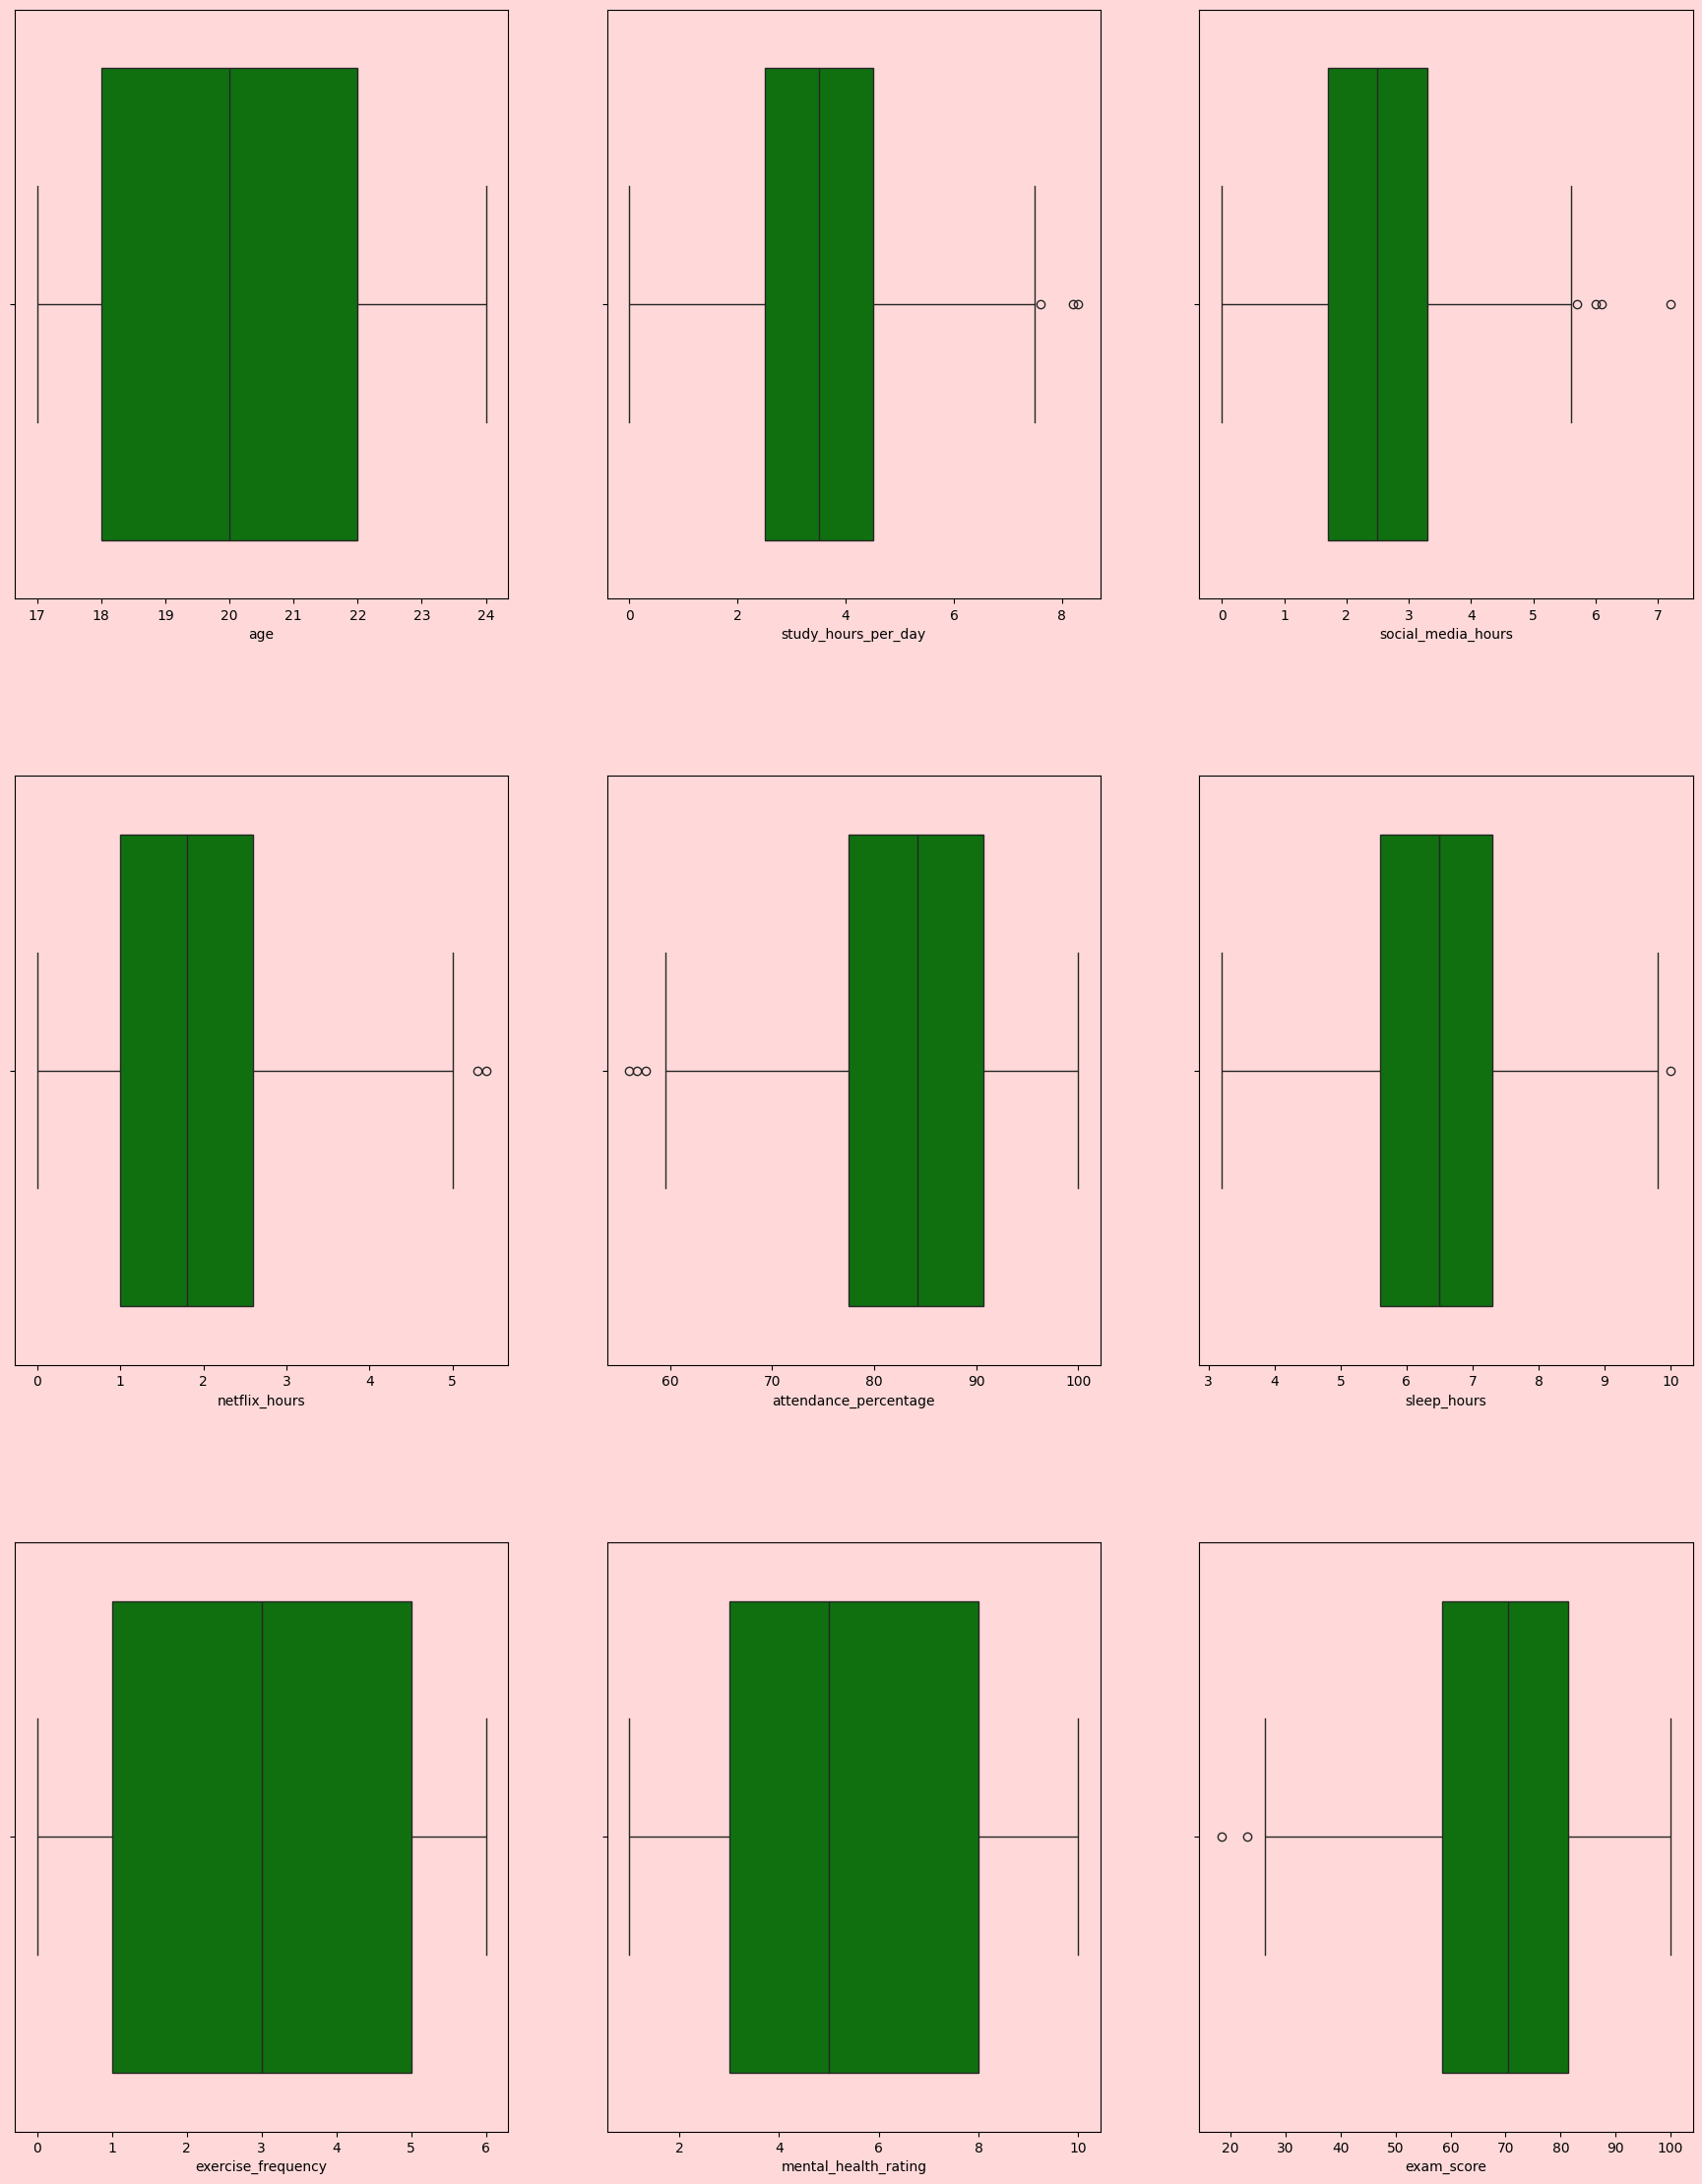

In [ ]:
# Creating subplots
fig = plt.figure(figsize=(22,28))
spec = fig.add_gridspec(3,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])

bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09]
cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O' and len(data[feature].unique())>2:
        sns.boxplot(data[feature], orient='h', ax=sec[cnt], color='green')
        cnt += 1


# OBSERVATION


*   Each column has little to no outliers present so no need to replace or remove the ouliers


